In [92]:
#-------------------------------
# Initial values
#-------------------------------
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

S_0 = 100
sigma = 0.2
T = 1
r_f = 0.01 #continously compunded, i.e. use the Eulers number e^(rt)
X = 100

In [41]:
#--------------------------------
# Binomial model function
#--------------------------------

def binomial_tree_calculation(S_0, X, r_f, T, sigma, n, u, d):
  dt = T/n
  r_disc = np.exp(-r_f * dt)
  p = (np.exp(r_f * dt) - d)/(u - d) # Continuous case here
  S_T = np.array([S_0 * (u**j) * (d**(n - j)) for j in range(n + 1)])
  payoff = np.maximum(S_T - X, 0)

  # backward induction
  for _ in range(n):
    payoff = r_disc * (p * payoff[1:] + (1-p) * payoff[:-1])

  return payoff[0]

#def binomial_tree_visualization(S_0)





In [47]:
# Part a)
u = np.exp(sigma)
d = 1/u


price_a = binomial_tree_calculation(S_0, X, r_f, T, sigma, n=1, u=u, d=d)
print(f"a) One period call price: {price_a:.4f}")

a) One period call price: 10.4147


1
1
n=  1 Call Price=10.9261
1
10
n= 10 Call Price=26.8814
1
100
n=100 Call Price=71.0826
1
200
n=200 Call Price=86.5565
1
500
n=500 Call Price=98.1845
1
1000
n=1000 Call Price=99.9160


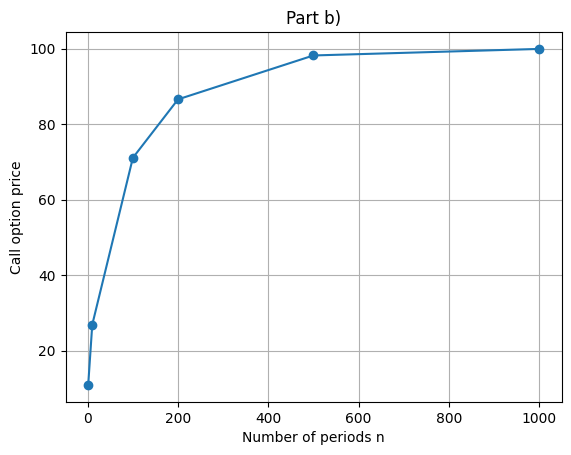

In [30]:
# Part b)
N = [1, 10, 100, 200, 500, 1000]
prices_b = []

for n in N:
  price = binomial_tree_calculation(S_0, X, r_f, T, sigma, n, u, d)
  prices_b.append(price)
  print(f"n={n:3d} Call Price={price:.4f}")

# Visualization
plt.plot(N, prices_b, marker='o')
plt.xlabel("Number of periods n")
plt.ylabel("Call option price")
plt.title("Part b)")
plt.grid()
plt.show()

N=1 CRR Call Price=10.4147
N=10 CRR Call Price=8.2377
N=100 CRR Call Price=8.4135
N=200 CRR Call Price=8.4234
N=500 CRR Call Price=8.4294
N=1000 CRR Call Price=8.4313


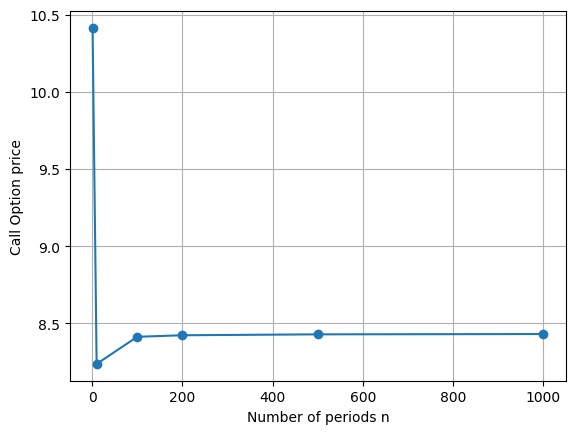

In [49]:
#------------------------------------
# Part c)
#------------------------------------

N = [1, 10, 100, 200, 500, 1000]
prices_c = []

def CRR_ud(sigma, T, N):
  dt = T/N
  u = np.exp(sigma * np.sqrt(dt))
  d = 1/u
  return u, d

for n in N:
  u, d = CRR_ud(sigma, T, n)
  price = binomial_tree_calculation(S_0, X, r_f, T, sigma, n, u=u, d=d)
  prices_c.append(price)
  print(f"N={n} CRR Call Price={price:.4f}")

plt.plot(N, prices_c, marker="o")
plt.xlabel("Number of periods n")
plt.ylabel("Call Option price")
plt.grid()
plt.show()

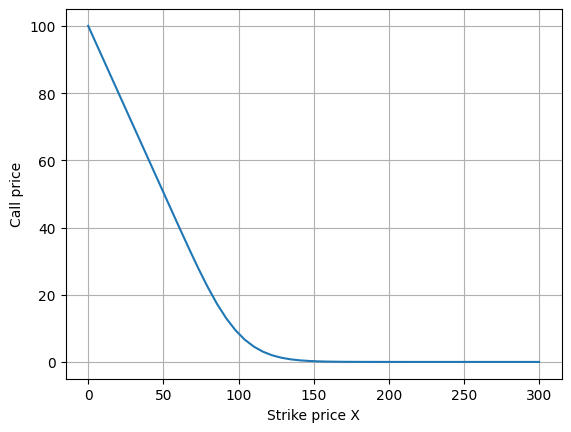

In [68]:
#----------------------------------------------------
# Part d)
#----------------------------------------------------

# i) Strike price

import numpy as np

n = 500

X = np.linspace(0, 300, 50)

prices = [binomial_tree_calculation(S_0, x, r_f, T, sigma, n, *CRR_ud(sigma, T, n)) for x in X]
plt.plot(X, prices)
plt.xlabel("Strike price X")
plt.ylabel("Call price")
plt.grid()
plt.show()

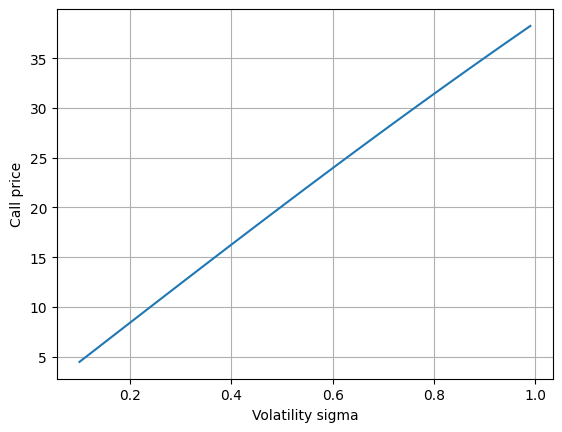

In [78]:
# ii) volatility sigma

import numpy as np

n = 1000

sigmas = np.arange(0.1, 1, 0.01)

prices = [binomial_tree_calculation(S_0, X, r_f, T, s, n, *CRR_ud(s, T, n)) for s in sigmas]
plt.plot(sigmas, prices)
plt.xlabel("Volatility sigma")
plt.ylabel("Call price")
plt.grid()
plt.show()

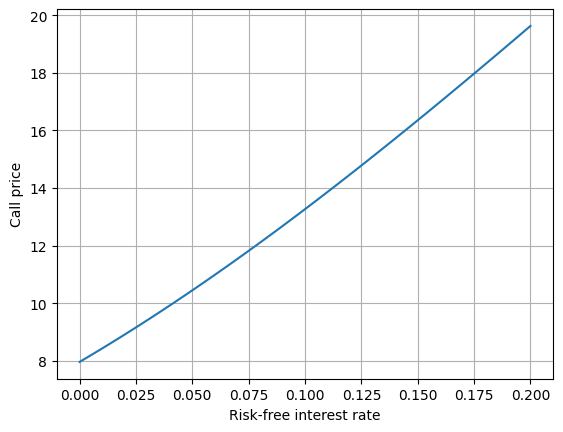

In [80]:
# iii) volatility risk free interest rate

import numpy as np

n = 500

rates = np.linspace(0.0, 0.2, 100)
prices = [binomial_tree_calculation(S_0, X, r, T, sigma, n, *CRR_ud(sigma, T, n)) for r in rates]

plt.plot(rates, prices)
plt.xlabel("Risk-free interest rate")
plt.ylabel("Call price")
plt.grid()
plt.show()

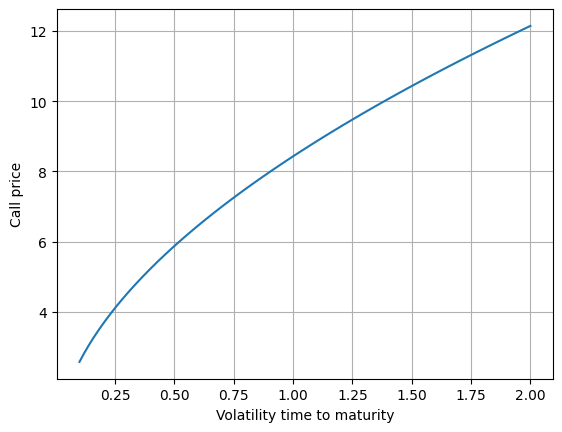

In [81]:
# iv) volatility time to maturity

import numpy as np

times = np.linspace(0.1, 2.0, 100)
n = 500

prices = [binomial_tree_calculation(S_0, X, r_f, t, sigma, n, *CRR_ud(sigma, t, n)) for t in times]

plt.plot(times, prices)
plt.xlabel("Volatility time to maturity")
plt.ylabel("Call price")
plt.grid()
plt.show()

In [83]:
#------------------------------------------------------
# Part e)
#------------------------------------------------------
def black_scholes_call(S_0, X, r_f, sigma, T):
  d1 = (np.log(S_0 / X) + (r_f + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  return S_0 * norm.cdf(d1) - X * np.exp(-r_f * T) * norm.cdf(d2)

bs_price = black_scholes_call(S_0, X, r_f, sigma, T)
crr_price = binomial_tree_calculation(S_0, X, r_f, T, sigma, n, *CRR_ud(sigma, T, n))

print(f"Black-Scholes Price: {bs_price:.4f}")
print(f"CRR Price: {crr_price:.4f}")


Black-Scholes Price: 8.4333
CRR Price: 8.4294


In [84]:
def bs_greeks(S0, K, T, r, sigma):
    d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    delta = norm.cdf(d1)
    gamma = norm.pdf(d1) / (S0 * sigma * np.sqrt(T))
    theta = (-S0 * norm.pdf(d1) * sigma / (2 * np.sqrt(T))
             - r * K * np.exp(-r * T) * norm.cdf(d2))
    vega = S0 * norm.pdf(d1) * np.sqrt(T)

    return delta, gamma, theta, vega


def taylor_call_approx(C0, dS, dt, dsigma, greeks):
    delta, gamma, theta, vega = greeks
    return (C0
            + delta * dS
            + 0.5 * gamma * dS**2
            + theta * dt
            + vega * dsigma)

# Not finished



In [88]:
import torch
from torch import nn

def generate_data(n=20000):
    S = np.random.uniform(50, 150, n)
    K = np.random.uniform(50, 150, n)
    T = np.random.uniform(0.1, 2.0, n)
    r = np.random.uniform(0.0, 0.05, n)
    sigma = np.random.uniform(0.1, 0.5, n)

    C = np.array([black_scholes_call(S[i], K[i], T[i], r[i], sigma[i])
                  for i in range(n)])

    X = np.column_stack([S, K, T, r, sigma])
    return torch.tensor(X, dtype=torch.float32), torch.tensor(C, dtype=torch.float32)

In [89]:
class PricingNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(5, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

In [90]:
X, y = generate_data()
model = PricingNN()

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

for epoch in range(3000):
    optimizer.zero_grad()
    pred = model(X).squeeze()
    loss = loss_fn(pred, y)
    loss.backward()
    optimizer.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch}, Loss {loss.item():.6f}")

Epoch 0, Loss 2465.339600
Epoch 500, Loss 96.354897
Epoch 1000, Loss 37.839100
Epoch 1500, Loss 20.705238
Epoch 2000, Loss 11.966969
Epoch 2500, Loss 9.751145


In [95]:
x_test = torch.tensor([[S_0, X, T, r_f, sigma]], dtype=torch.float32)

nn_price = model(x_test).item()
print("Neural network price:", nn_price)
bsm_price = black_scholes_call(S_0, X, r_f, sigma, T)
print("BSM price:", bsm_price)

Neural network price: 13.688228607177734
BSM price: 8.433318690109608
